<a href="https://colab.research.google.com/github/farimaahchz/sales_test/blob/main/01_Test_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# I. Intro


---


---




Creating a data integration tool with Python to replace Talend

# II. Map

---



---



## ***Defining Use Case and Goals***


*   **Use Case:** Building a data integration tool that can connect to various data sources and perform transformations on the data.

*  **Goals:** The tool should be flexible, easy to use, and capable of handling large volumes of data.

*  **long-term Goals**

*   ***Metrics :*** How do we know if we reached our goal







## ***Identify Technologies and Tools***


*   ***Python:*** For scripting and data manipulation.
*   ***Pandas:*** For data manipulation.
*  ***Airflow:*** For scheduling and monitoring tasks.
*  ***Docker:*** For containerization and deployment.
*   ***SQL***





## ***Define User Stories***

*   As a user, I want to connect to different data sources and retrieve data.
*   As a user, I want to transform and clean data.

*   As a user, I want to integrate data from different sources.
*   As a user, I want to schedule and monitor data integration tasks.



## Risks

##  HMW (How Might We) notes

# III. Sketch

---

---

1.   brain storming and story board
2.   detailed solution for the target moment




### *Data Flow*
Data will flow from various sources through
transformation tasks to the destination.

## *Task Dependencies*
 prioritizing tasks.  Certain tasks (e.g., data cleaning) may need to be completed before others (e.g., data integration).

# IV. Decide

---



---



### Select Technologies and Tools
Finalizing the technologies to build up the pipeline


## Define Task Priorities
 Decide on the priority of the different tasks in pipeline.

## Define a Sprint Plan
 Planning the specific tasks in each sprint and breaking down user stories into smaller tasks, estimating the time and effort required for each task

# V. Portotype

---



---

building the data pipeline


## **A. Importig necessary modules**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

%load_ext google.colab.data_table

The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table


## **B. importing the datasets**

In [29]:
# Load the CSV file into a DataFrame
df = pd.read_csv('/amazon.csv')
#df
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

## **C. General preparation and cleaning of data**


In [30]:
#Checking for missing values
df.isnull().sum()
#dropping some columns
df.drop(['product_name','user_id','user_name','review_content', 'review_id','img_link','product_link'], axis=1, inplace=True)
df.head()

,product_id,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,review_title
0,B07JW9H4J1,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"Satisfied,Charging is really fast,Value for mo..."
1,B098NS6PVG,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","A Good Braided Cable for Your Type C Device,Go..."
2,B096MSW6CT,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"Good speed for earlier versions,Good Product,W..."
3,B08HDJ86NZ,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"Good product,Good one,Nice,Really nice product..."
4,B08CF3B7N1,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"As good as original,Decent,Good one for second..."


In [31]:
df=df.dropna()
#replacing and convert into correct data type
df['actual_price'] = df['actual_price'].str.replace('₹', '').str.replace(',', '')
df['actual_price'] = df['actual_price'].astype(float)

df['discounted_price'] = df['discounted_price'].str.replace('₹', '').str.replace(',', '')
df['discounted_price'] = df['discounted_price'].astype(float)

df['discount_percentage'] = df['discount_percentage'].str.replace('%', '')
df['discount_percentage'] = df['discount_percentage'].astype(int)

df['rating_count'] = df['rating_count'].str.replace(',', '')
df['rating_count'] = df['rating_count'].astype(int)

df['rating'] = df['rating'].replace('|', np.nan)
df['rating'] = df['rating'].astype(float)


df.head(5)

<ipython-input-31-c52edd32762f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['actual_price'] = df['actual_price'].str.replace('₹', '').str.replace(',', '')
<ipython-input-31-c52edd32762f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['actual_price'] = df['actual_price'].astype(float)
<ipython-input-31-c52edd32762f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,product_id,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,review_title
0,B07JW9H4J1,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,64,4.2,24269,High Compatibility : Compatible With iPhone 12...,"Satisfied,Charging is really fast,Value for mo..."
1,B098NS6PVG,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,43,4.0,43994,"Compatible with all Type C enabled devices, be...","A Good Braided Cable for Your Type C Device,Go..."
2,B096MSW6CT,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,90,3.9,7928,【 Fast Charger& Data Sync】-With built-in safet...,"Good speed for earlier versions,Good Product,W..."
3,B08HDJ86NZ,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,53,4.2,94363,The boAt Deuce USB 300 2 in 1 cable is compati...,"Good product,Good one,Nice,Really nice product..."
4,B08CF3B7N1,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,61,4.2,16905,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"As good as original,Decent,Good one for second..."


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1463 entries, 0 to 1464
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1463 non-null   object 
 1   category             1463 non-null   object 
 2   discounted_price     1463 non-null   float64
 3   actual_price         1463 non-null   float64
 4   discount_percentage  1463 non-null   int64  
 5   rating               1462 non-null   float64
 6   rating_count         1463 non-null   int64  
 7   about_product        1463 non-null   object 
 8   review_title         1463 non-null   object 
dtypes: float64(3), int64(2), object(4)
memory usage: 114.3+ KB


## D. Pipeline Functions

---
Extraction, Transformation, and Loading.


In [33]:
from sqlalchemy import create_engine


In [34]:
# Step 1: Extract data from the CSV file
def extract_data():
    return df

In [35]:
#Splitting category column and creating four new categories
df_cat = df['category'].str.split('|', expand=True).rename(columns={0:'category_1', 1:'category_2', 2:'category_3', 3:'category_4',4:'category_5'})

df['category_1'] = df_cat['category_1']
df['category_2'] = df_cat['category_2']
df['category_3'] = df_cat['category_3']
df['category_4'] = df_cat['category_4']

df.drop('category', axis=1, inplace=True)
df.head()



,product_id,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,review_title,category_1,category_2,category_3,category_4
0,B07JW9H4J1,399.0,1099.0,64,4.2,24269,High Compatibility : Compatible With iPhone 12...,"Satisfied,Charging is really fast,Value for mo...",Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables
1,B098NS6PVG,199.0,349.0,43,4.0,43994,"Compatible with all Type C enabled devices, be...","A Good Braided Cable for Your Type C Device,Go...",Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables
2,B096MSW6CT,199.0,1899.0,90,3.9,7928,【 Fast Charger& Data Sync】-With built-in safet...,"Good speed for earlier versions,Good Product,W...",Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables
3,B08HDJ86NZ,329.0,699.0,53,4.2,94363,The boAt Deuce USB 300 2 in 1 cable is compati...,"Good product,Good one,Nice,Really nice product...",Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables
4,B08CF3B7N1,154.0,399.0,61,4.2,16905,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"As good as original,Decent,Good one for second...",Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables


In [36]:
df=df.dropna()

In [37]:
df['Price']=df['discounted_price']*df['rating_count']
df['Price']

0        9683331.0
1        8754806.0
2        1577672.0
3       31045427.0
4        2603370.0
           ...    
1460      413110.0
1461     9389040.0
1462     1038492.0
1463    11235369.0
1464    20003781.0
Name: Price, Length: 1297, dtype: float64

In [46]:
# Step 2: Transform

def transform_data(df):
    # Assuming we want to calculate total revenue per category_3
    return df.groupby('category_3').agg({'Price': 'sum'}).reset_index()


In [47]:
# Step 3: Load the data into a database
def load_data(df):
    engine = create_engine('sqlite:///sales.db')
    df.to_sql('sales_summary', engine, if_exists='replace', index=False)

In [48]:
#Run the Data Pipeline: running by calling the functions we defined

# Step 1: Extract data
data = extract_data()

# Step 2: Transform data
transformed_data = transform_data(data)

# Step 3: Load data
load_data(transformed_data)

visualizing the result

In [58]:
import matplotlib.pyplot as plt

def visualize_data(df):
    # Plot a bar chart of total sale for category_3
    plt.figure(figsize=(10, 6))
    plt.bar(df['category_3'], df['Price'])
    plt.xlabel('category_3')
    plt.ylabel('Total Revenue')
    plt.title('Total sale per category')
    plt.xticks(rotation=90)
    plt.show()

In [59]:
def load_data(df):
    engine = create_engine('sqlite:///sales.db')
    df.to_sql('sales_summary', engine, if_exists='replace', index=False)

    # Visualize the data
    visualize_data(df)

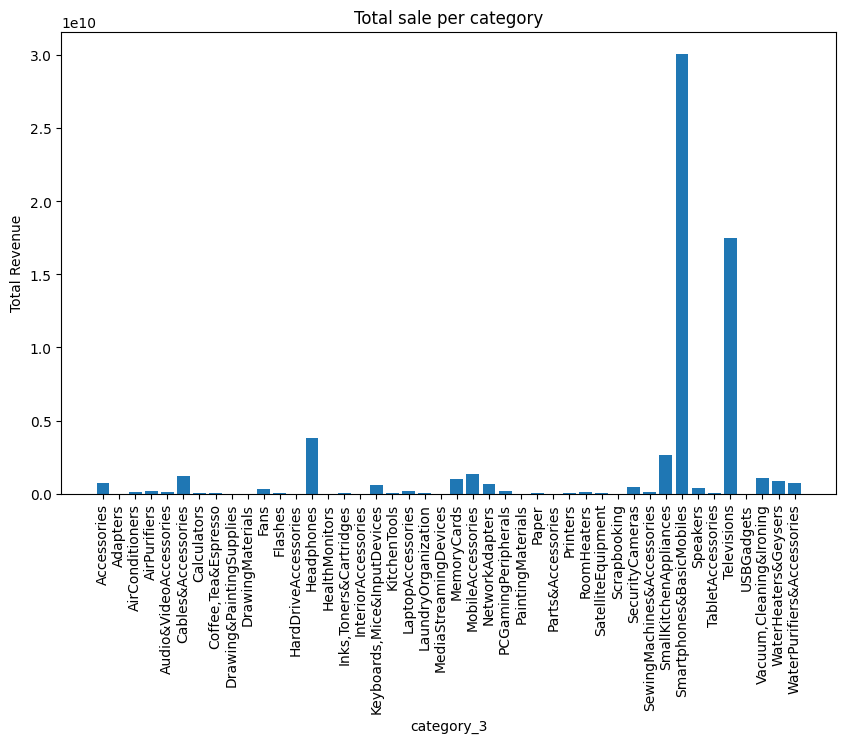

In [60]:
# Step 1: Extract data
data = extract_data()

# Step 2: Transform data
transformed_data = transform_data(data)

# Step 3: Load data
load_data(transformed_data)

# VI. Test

---



---

